# Notebook 1.2 - Tensor 
## Realworld data 

The purpose of this notebook is:
* Real-world data represented as PyTorch tensors 
* Working with a range of data types 
* Converting data to tensors
* Loading data from a file   
* Shaping tensors
* Familiariazing with imageio package

## Installation of imageio package
Run it if ```imageio``` package hasn't been installed

In [ ]:
! pip install imageio

## Download images

In [1]:
! mkdir examples
! gdown https://drive.google.com/uc?id=12X4bI3ut850Ly8og1T-BeaG3u_kCcz3S -O ./examples/usc_sipi_mandrill.tiff
! gdown https://drive.google.com/uc?id=1B7MF-szAGlXCtoWrrMbGMfTQ2MY8KX6t -O ./examples/usc_sipi_peppers.tiff
! gdown https://drive.google.com/uc?id=1VN-NJ9iZcqyaZ_2jbo-PaHxwez8LRYkH -O ./examples/usc_sipi_sailboat.tiff

A subdirectory or file examples already exists.
Downloading...
From: https://drive.google.com/uc?id=12X4bI3ut850Ly8og1T-BeaG3u_kCcz3S
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\usc_sipi_mandrill.tiff

  0%|          | 0.00/787k [00:00<?, ?B/s]
 67%|######6   | 524k/787k [00:05<00:02, 103kB/s]
100%|##########| 787k/787k [00:05<00:00, 154kB/s]
Downloading...
From: https://drive.google.com/uc?id=1B7MF-szAGlXCtoWrrMbGMfTQ2MY8KX6t
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\usc_sipi_peppers.tiff

  0%|          | 0.00/787k [00:00<?, ?B/s]
 67%|######6   | 524k/787k [00:09<00:04, 57.4kB/s]
100%|##########| 787k/787k [00:10<00:00, 83.6kB/s]
100%|##########| 787k/787k [00:10<00:00, 76.6kB/s]
Downloading...
From: https://drive.google.com/uc?id=1VN-NJ9iZcqyaZ_2jbo-PaHxwez8LRYkH
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\usc_sipi_sailboat.tiff

  0%|          | 

## Loading image - 2D data
We use ```imageio``` because it supports different data types with unifom user interface.

In [2]:
import torch
import imageio
import matplotlib.pyplot as plt
import os
import numpy as np

Load image "usc_sipi_peppers.tiff"

shape = (512, 512, 3)


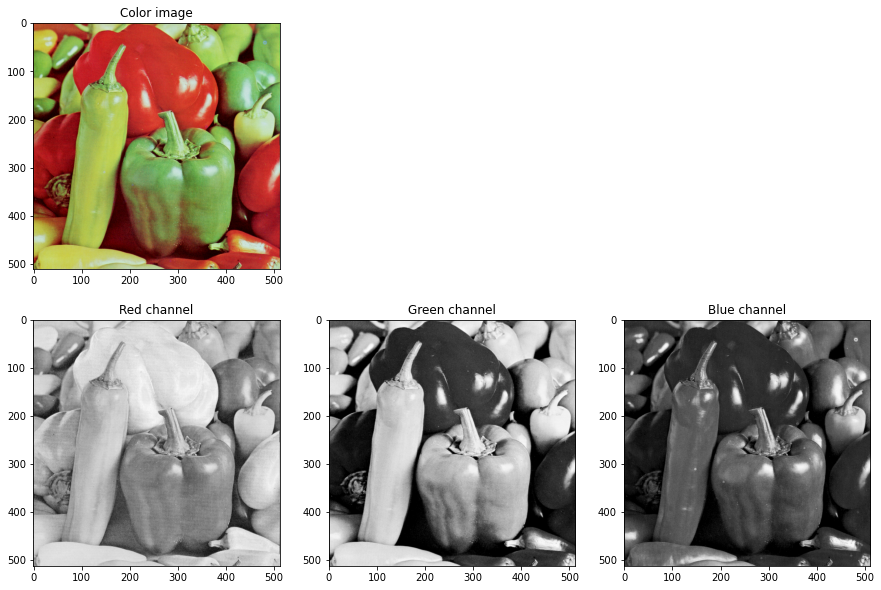

In [3]:
np_img = imageio.imread('./examples/usc_sipi_peppers.tiff')
print("shape = {}".format(np_img.shape))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0,0].imshow(np_img)
axes[0,0].set_title("Color image")
axes[0,1].axis('off')
axes[0,2].axis('off')
axes[1,0].imshow(np_img[:,:,0],cmap='gray')
axes[1,0].set_title("Red channel")
axes[1,1].imshow(np_img[:,:,1],cmap='gray')
axes[1,1].set_title("Green channel")
axes[1,2].imshow(np_img[:,:,2],cmap='gray')
axes[1,2].set_title("Blue channel")
plt.show()

Convert imported image into tensor

In [4]:
t_img = torch.from_numpy(np_img)
out = t_img.permute(2,1,0)
print(out.shape)
t_img.storage().data_ptr() == out.storage().data_ptr()

torch.Size([3, 512, 512])


True

Load images from a folder

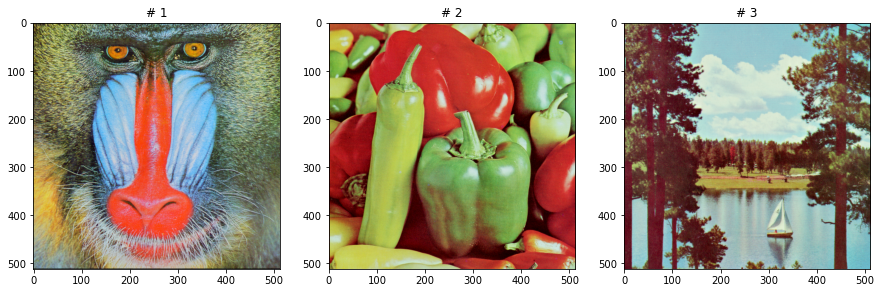

In [5]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 512, 512, dtype=torch.uint8)
data_dir = './examples'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.tiff'] 
for i, filename in enumerate(filenames):
    if i >= batch_size:
        break
    np_img = imageio.imread(os.path.join(data_dir, filename)) 
    batch[i] = torch.from_numpy(np_img).permute(2, 0, 1)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(batch[0].permute(1,2,0).numpy())
axes[0].set_title("# 1")
axes[1].imshow(batch[1].permute(1,2,0).numpy())
axes[1].set_title("# 2")
axes[2].imshow(batch[2].permute(1,2,0).numpy())
axes[2].set_title("# 3")
plt.show()

## Loading image - 3D data

Download breast MRI data

In [6]:
! gdown --folder 1O5rRJxzgHtHy2By0BS_m9mPUuTLQUfZg -O ./examples/volumetric_data
! gdown --folder 1YehgUAS2GjR-P_xTsbU6S8MYhjCBwS_y -O ./examples/volumetric_data

Processing file 1Q49peLm2ncObJqjA7DJxv_X1wrHxRpGW Image-1.dcm
Processing file 1vDpsFqzVYny_Kq3qYFuDOfkUwizLQ-WW Image-2.dcm
Processing file 1ODlsJtU8gsNPNAUQvd81sAX_YrBeJ4lc Image-3.dcm
Processing file 1d8Gp2kXFMKgdmBnoHA2QqQAFru0_owQn Image-4.dcm
Processing file 1of-wsiH0tayZLmTQ3n_LJg4oa09MiHcQ Image-5.dcm
Processing file 1DJrVs5VPyz4boLNB647BNi8irxDxPqTP Image-6.dcm
Processing file 1Xfs2G_XCDlH5GmeE7YBMkEmaZqrJLZFQ Image-7.dcm
Processing file 1FqQNqirZxsUwUdogqrwgcbwKp0DAt_Qr Image-8.dcm
Processing file 166jOCNun8NVlX6Xwd45SVoPIqIwUIb2C Image-9.dcm
Processing file 1xR4FVhmSenvQ_R_mg1eOxNc_Clb6Nzca Image-10.dcm
Processing file 1Ehz8CJ1Mgg-v-P6Sgxp9YW--aKrVizcq Image-11.dcm
Processing file 1dsGsN91ORKoGf0jbf4ytnOLcBzWtCGJH Image-12.dcm
Processing file 11oAKo7Fx_alWRxRfYeg1AZeiG4_AMnSO Image-13.dcm
Processing file 1LHd5afaCiaacghBPU-wwEhb_fMae9yCX Image-14.dcm
Processing file 1rjPcLey2jh8RF5xP8dIG0Ca89sLd5TQt Image-15.dcm
Processing file 1bUjYaz7Cas3xGdj4aCLw1LXOxZOC0BeU Image-16.dcm
P

Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Q49peLm2ncObJqjA7DJxv_X1wrHxRpGW
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\volumetric_data\Image-1.dcm

  0%|          | 0.00/559k [00:00<?, ?B/s]
 94%|#########3| 524k/559k [00:00<00:00, 610kB/s]
100%|##########| 559k/559k [00:00<00:00, 610kB/s]
Downloading...
From: https://drive.google.com/uc?id=1vDpsFqzVYny_Kq3qYFuDOfkUwizLQ-WW
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\volumetric_data\Image-2.dcm

  0%|          | 0.00/559k [00:00<?, ?B/s]
 94%|#########3| 524k/559k [00:00<00:00, 599kB/s]
100%|##########| 559k/559k [00:00<00:00, 603kB/s]
Downloading...
From: https://drive.google.com/uc?id=1ODlsJtU8gsNPNAUQvd81sAX_YrBeJ4lc
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples

Processing file 1BKNJxo-aleptwN8AU0ApMbWHYK9jEZt- Image-42.dcm
Processing file 14ikCSQsIRzWR6z0tJfL707H6n7Zbr-pi Image-43.dcm
Processing file 1FXnFp2Gvr1mov02CcHXmPufosZJusnvo Image-44.dcm
Processing file 1GjBCUd898-583yLqRiHAAFjN7iXCFUmY Image-45.dcm



  0%|          | 0.00/559k [00:00<?, ?B/s]
 94%|#########3| 524k/559k [00:01<00:00, 264kB/s]
100%|##########| 559k/559k [00:02<00:00, 262kB/s]
100%|##########| 559k/559k [00:02<00:00, 263kB/s]
Downloading...
From: https://drive.google.com/uc?id=1dsGsN91ORKoGf0jbf4ytnOLcBzWtCGJH
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\volumetric_data\Image-12.dcm

  0%|          | 0.00/559k [00:00<?, ?B/s]
 94%|#########3| 524k/559k [00:00<00:00, 547kB/s]
100%|##########| 559k/559k [00:01<00:00, 552kB/s]
Downloading...
From: https://drive.google.com/uc?id=11oAKo7Fx_alWRxRfYeg1AZeiG4_AMnSO
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\volumetric_data\Image-13.dcm

  0%|          | 0.00/559k [00:00<?, ?B/s]
 94%|#########3| 524k/559k [00:00<00:00, 612kB/s]
100%|##########| 559k/559k [00:00<00:00, 615kB/s]
Downloading...
From: https://drive.google.com/uc?id=1LHd5afaCiaacghBPU-wwEhb_fMae9yCX
To: d:\niksa\documents\c

Processing file 1QZrvWA_XPnkCYxsq5dCiC0Lqu6h0d1CC Image-46.dcm
Processing file 1wOhAFTW-_cHkH-N6fP1HMhWZ2uTvEnkd Image-47.dcm
Processing file 1fq4Q4tIGjMq10ErGr08b3-JsIyaLK8ms Image-48.dcm
Processing file 1IxlBuLz8_KsRWZVY_vttlnjzTFY-ZA4M Image-49.dcm
Processing file 1SPYxjuHqRFNFi0eR2wAW-s0XTd8T_o_A Image-50.dcm
Processing file 1M_GFbKihMHFehrFrI_yYNb3Bi_EUjD7P Image-51.dcm
Processing file 1Q6DxQmtD4R0isjn17COywkjbnTPmkgkl Image-52.dcm
Processing file 1OOHIu6jLUlT3iyTVGHzjziFTzBdfXZ4u Image-53.dcm
Processing file 1tAo6kktaZJNP6HtbVSbZRXF67nwdd1-R Image-54.dcm
Processing file 1V8TG-Jq04-5QaWzbL_jMxpKyb6YoB4bL Image-55.dcm
Processing file 15Dz87hfHTghhWbdr4LvgZdkN1SJi4WdY Image-56.dcm
Processing file 1Jg96ATGF3s2ko3uHlW3KT2tocp2i01W9 Image-57.dcm
Processing file 197RqRPgdQK7OJ23O8KqD2QHAn7UjMnPo Image-58.dcm
Processing file 1n2GfeYrcOteTtVGFEXr5KSQOmv7bn9EA Image-59.dcm
Processing file 16cg-40tkYrszD22tyDDN4d3jguNyLs6f Image-60.dcm
Processing file 145jbVQMIHNIYrZvOUUtGoue3g6eVmhyz Image

Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1QZrvWA_XPnkCYxsq5dCiC0Lqu6h0d1CC

but Gdown can't. Please check connections and permissions.


Reading DICOM (examining files): 1/39 files (2.6%9/39 files (23.125/39 files (64.1%39/39 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 39/39  (100.0%)
shape = (39, 512, 512)
dtype = int16


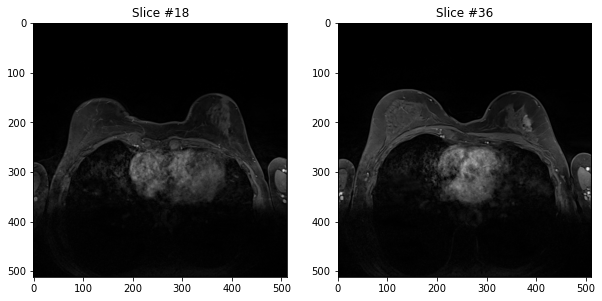

In [7]:
dir_path = "./examples/volumetric_data"
np_arr = imageio.volread(dir_path, 'DICOM')
print("shape = {}".format(np_arr.shape))
print("dtype = {}".format(np_arr.dtype))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(np_arr[17], cmap='gray')
axes[0].set_title("Slice #18")
axes[1].imshow(np_arr[35], cmap='gray')
axes[1].set_title("Slice #36")
plt.show()

In [8]:
t_arr = torch.from_numpy(np_arr).float() 
t_arr = torch.unsqueeze(t_arr, 0)
print("shape = {}".format(t_arr.shape))

shape = torch.Size([1, 39, 512, 512])


## Working with time series
Download data from Google drive

In [11]:
! gdown --folder 16XaoqUvPx3koVqR_RZyP2bTQhRMNb8r4 -O ./examples/bike_sharing

Processing file 1gppPMUo-bJ2h9gII1R9K8YUfj-djpDa4 day.csv
Processing file 12vEuiZjIKEF7bgWN9s6wg9QhyKknYuNU fix_missing_hours.py
Processing file 1IT5WQyqdXpRwWaXSrBMqTaaB2DrnFSG3 hour-fixed.csv
Processing file 18TD3-RlyCPVSkpeXwplmzTI_rqAjVILb hour.csv
Processing file 1UCxVTLMoolerJwNds2savRHO0nhhtVCq Readme.txt


Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1gppPMUo-bJ2h9gII1R9K8YUfj-djpDa4
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\bike_sharing\day.csv

  0%|          | 0.00/56.8k [00:00<?, ?B/s]
100%|##########| 56.8k/56.8k [00:00<00:00, 54.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=12vEuiZjIKEF7bgWN9s6wg9QhyKknYuNU
From (redirected): https://drive.google.com/uc?id=12vEuiZjIKEF7bgWN9s6wg9QhyKknYuNU&confirm=t&uuid=68e4081d-f01e-4f17-b74d-f88717dee488
To: d:\niksa\documents\courses\principi_dubokog_ucenja\auth_summer_school\ipynb\examples\bike_sharing\fix_missing_hours.py

  0%|          | 0.00/1.15k [00:00<?, ?B/s]
100%|##########| 1.15k/1.15k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1IT5WQyqdXpRwWaXSrBMqTaaB2DrnFSG3
To: d:\niksa\documents\courses\principi_du

### Bike Sharing Dataset
- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days
 
Fields meaning
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [12]:
bikes_np = np.loadtxt( "./examples/bike_sharing/hour-fixed.csv", dtype=np.float32,
                         delimiter=",", skiprows=1, converters={1: lambda x: float(x[8:10])})

In [13]:
bikes_np.shape

(17520, 17)

**How to prepare data for training?**
1. Treat each row as independent of others?
2. Try to explore time dependencies between rows?

Create $N$ sequences of length $L$ containing $C$ features.

In [14]:
bikes = torch.from_numpy(bikes_np)
print("bikes shape = {}, stride = {}".format(bikes.shape, bikes.stride()))

bikes shape = torch.Size([17520, 17]), stride = (17, 1)


In [15]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
print("daily_bikes shape = {}, stride = {}".format(daily_bikes.shape, daily_bikes.stride()))
print(daily_bikes.storage().data_ptr() == bikes.storage().data_ptr())

daily_bikes shape = torch.Size([730, 24, 17]), stride = (408, 17, 1)
True


In [16]:
daily_bikes = daily_bikes.transpose(1,2)
print("daily_bikes shape = {}, stride = {}".format(daily_bikes.shape, daily_bikes.stride()))

daily_bikes shape = torch.Size([730, 17, 24]), stride = (408, 1, 17)


Create one hot vector - for categorical variables

In [17]:
weathersit = 9 
weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2]) 
print(daily_bikes[0,weathersit])

tensor([1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        3., 3., 2., 2., 2., 2.])


In [18]:
weather_onehot.scatter_( dim=1, index=daily_bikes[:,weathersit].unsqueeze(1).long() - 1, value=1.0)
daily_bikes = torch.cat((daily_bikes, weather_onehot), 1)
daily_bikes[0,(9,17,18,19,20),:]

tensor([[1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
         3., 3., 2., 2., 2., 2.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
         0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])